In [32]:
# import library
import re
import os 
import glob
import random
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, Nadam
from keras.applications import vgg16, InceptionV3
from keras import callbacks
import time
import warnings
warnings.filterwarnings('ignore')


In [56]:
def predict():
    #load model
    model = keras.models.load_model('InceptionV3.h5')
    # define base path
    base_path = '../Project3/predict_pic'
    # check data classes
    classes = os.listdir(base_path)
    # count data
    img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
    print(len(img_list))
    # plot some random image at random classes
    for i, img_path in enumerate(img_list):
        img = load_img(img_path)
        img = img_to_array(img, dtype=np.uint8)
    train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range = 20,
                                  horizontal_flip=True,
                                  vertical_flip=True)   
    validation_generator = train_datagen.flow_from_directory(base_path,
                                                       target_size=(224,224),
                                                       batch_size=100,
                                                       class_mode='categorical',
                                                       #subset='validation',
                                                       seed=0)
    labels = validation_generator.class_indices
    labels = dict((v, k) for k, v in labels.items())
    X_test, y_test = validation_generator.__getitem__(0)
    t1 = time.time()
    preds = model.predict(X_test)
    # Testing has finished 
    t2 = time.time()
    print( '\n Time taken was {:3f} seconds.'.format(( t2 - t1)/len(img_list)))
    plt.figure(figsize=(15, 10))
    for i in range(len(img_list)):
        plt.subplot(2, 3, i+1)
        plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(y_test[i])]))
        plt.imshow(X_test[i])
    return 

6
Found 6 images belonging to 6 classes.

 Time taken was 0.770444 seconds.


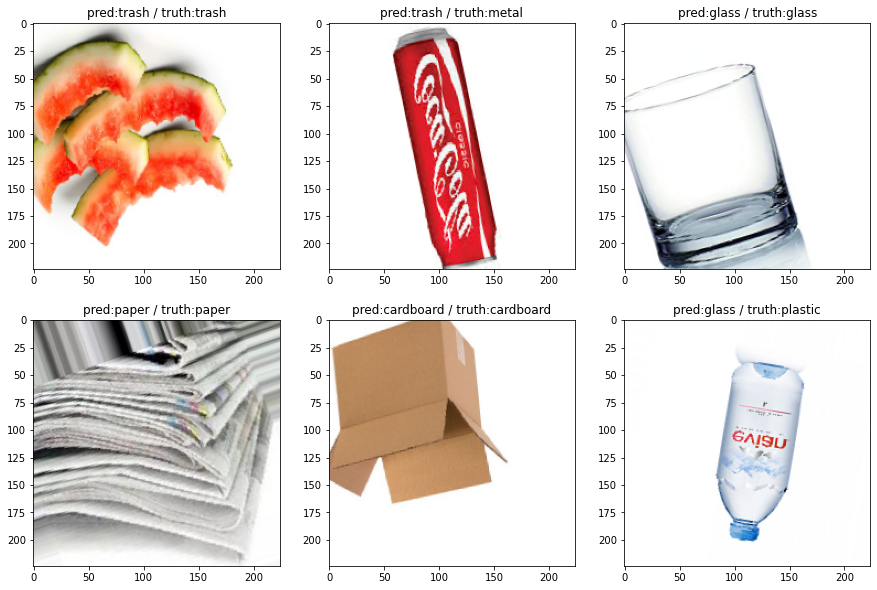

In [57]:
predict()